In [22]:
%matplotlib inline
import json
import os
import functional
import pandas as pd
import fastcluster
from scipy.cluster.hierarchy import dendrogram, to_tree
import seaborn as sns
from ete3 import Tree, ClusterTree, TreeStyle, AttrFace, ProfileFace, TextFace
from ete3.treeview.faces import add_face_to_node

In [2]:
def joinpath(a, *args):
    return os.path.join(a, *args)

In [3]:
input_dir = "/media/pika/Workbench/workspace/pywgMLST/data/wgmlst/5fdbddee-c19e-11e6-bf47-dc85de763f2b"
target_dir = input_dir + "/scheme/locusAP/locusAP_core_80p_dispensable"

In [4]:
with open(input_dir + "/namemap.json", "r") as f:
    namemap = json.loads("".join(f.readlines()))
namemap

{'Assembly_1': 'GCF_000624115',
 'Assembly_10': 'GCF_000624295',
 'Assembly_2': 'GCF_000624135',
 'Assembly_3': 'GCF_000624155',
 'Assembly_4': 'GCF_000624175',
 'Assembly_5': 'GCF_000624195',
 'Assembly_6': 'GCF_000624215',
 'Assembly_7': 'GCF_000624235',
 'Assembly_8': 'GCF_000624255',
 'Assembly_9': 'GCF_000624275'}

In [5]:
columns = []
nodeLabel = []
for filename in os.listdir(target_dir):
    sample = filename.split(".")[1]
    data = (functional.seq(open(joinpath(target_dir, filename)).read().splitlines())
            .map(lambda line: tuple(line.split("\t")))
            .map(lambda x: (x[0], True if x[1] != "0" else False))
            .to_dict())
    columns.append(pd.Series(data, name=sample))
    nodeLabel.append(sample.replace("Assembly_", "A") + "\t" + namemap[sample])
matrix = pd.concat(columns, axis=1)
matrix

,Assembly_1,Assembly_9,Assembly_4,Assembly_10,Assembly_7,Assembly_5,Assembly_8,Assembly_6,Assembly_3,Assembly_2
SAL0000001,True,True,True,True,True,True,True,True,True,True
SAL0000002,True,True,True,True,True,True,True,True,True,True
SAL0000003,True,True,True,True,True,True,True,True,True,True
SAL0000004,True,True,True,True,True,True,True,True,True,True
SAL0000005,True,True,True,True,True,True,True,True,True,True
SAL0000006,True,True,True,True,True,True,True,True,True,True
SAL0000007,True,True,True,True,True,True,True,True,True,True
SAL0000008,True,True,True,True,True,True,True,True,True,True
SAL0000009,True,True,True,True,True,True,True,True,True,True
SAL0000010,True,True,True,True,True,True,True,True,True,True


In [6]:
Y = fastcluster.linkage(matrix.T, method="average", metric="hamming")

In [7]:
num_matrix = matrix.applymap(lambda x: 1 if x else 0)

In [14]:
cmap = sns.dark_palette("yellow", reverse=True, as_cmap=True)

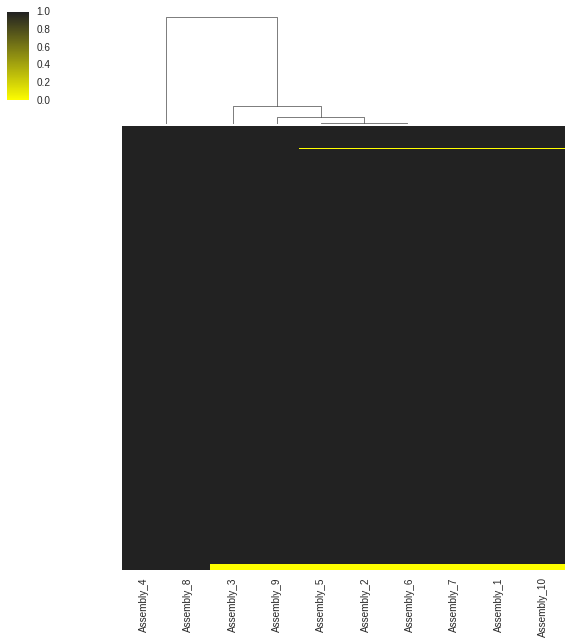

In [16]:
sns.clustermap(num_matrix, col_linkage=Y, row_cluster=False, yticklabels=[], cmap=cmap)

In [17]:
def linkage2newick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "{}:{:.2f}{}".format(leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):{:.2f}{}".format(parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = linkage2newick(node.get_left(), newick, node.dist, leaf_names)
        newick = linkage2newick(node.get_right(), ",{}".format(newick), node.dist, leaf_names)
        newick = "({}".format(newick)
        return newick

In [18]:
tree = to_tree(Y, False)
newick = linkage2newick(tree, "", tree.dist, list(matrix.columns))

In [21]:
t = Tree(newick)
print(t)


                        /-Assembly_10
                     /-|
                  /-|   \-Assembly_1
                 |  |
               /-|   \-Assembly_7
              |  |
            /-|   \-Assembly_6
           |  |
         /-|   \-Assembly_2
        |  |
      /-|   \-Assembly_5
     |  |
   /-|   \-Assembly_9
  |  |
--|   \-Assembly_3
  |
  |   /-Assembly_8
   \-|
      \-Assembly_4


In [37]:
# t.write(format=1, outfile="phylogenetic_tree.newick")

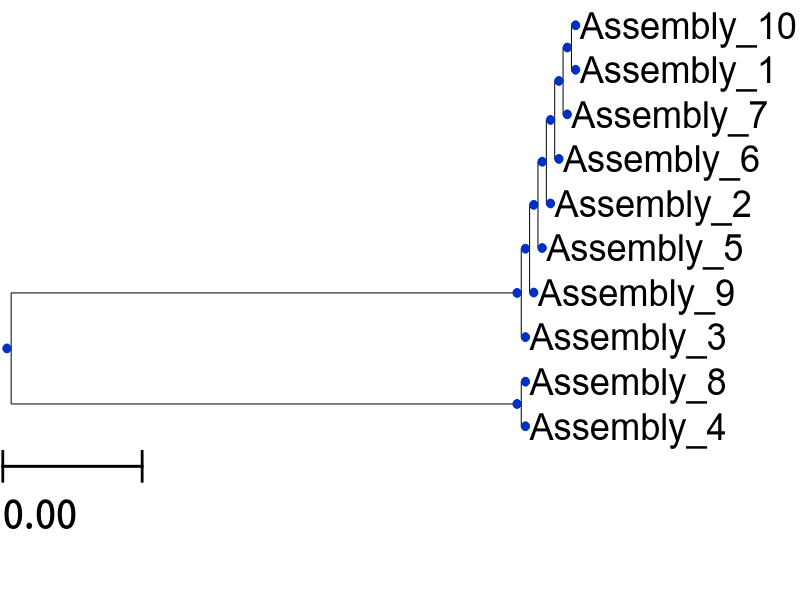

In [40]:
t.render("%%inline", w=800, h=600, units="px", dpi=300)